In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [233]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [234]:
data = pd.read_csv('train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [235]:
# data has total 1460 entries and 81 features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [236]:
data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [237]:
# some numerical features need to be transformed to categorical ones
# MSSubClass, OverallQual, OverallCond
data[['MSSubClass', 'OverallQual', 'OverallCond']] = data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [238]:
def get_cat_num_features(data):
    categorical_features = []
    numerical_features = []
    for column in data.columns:
        if data[column].dtype == 'object':
            categorical_features.append(column)
        else:
            numerical_features.append(column)
    return categorical_features, numerical_features

categorical_features, numerical_features = get_cat_num_features(data)

In [239]:
data.isna().sum().sum()

6965

In [240]:
# Feature with missing value
# for categorical variables such as Alley, MiscFeature, Fence, PoolQC, FireplaceQu nan represent absent ammenity
# which is also part of data hence dropping it would not be good strategy

# for numberical features we can use simple and stratightfoward approach to impute missing values wth median
# not using mean as it is sensitive to outliers.

nans = (data.isna().sum()/(len(data))) * 100
nans[nans>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [241]:
# imputing missing values

for feature in categorical_features:
    data[feature].fillna("absent", inplace=True)
    
for feature in numerical_features:
    data[feature].fillna(data[feature].median(), inplace=True)    

In [242]:
data.isna().sum().sum()

0

### Data Cleaning

In [243]:
data.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street   Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  absent      Reg   
1   2         20       RL         80.0     9600   Pave  absent      Reg   
2   3         60       RL         68.0    11250   Pave  absent      IR1   
3   4         70       RL         60.0     9550   Pave  absent      IR1   
4   5         60       RL         84.0    14260   Pave  absent      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           7           5       2003   
1       Norm     1Fam     1Story           6           8       1976   
2       Norm     1Fam     2Story           7           5       2001   
3       Norm     1Fam     2Story           7           5       1915   
4       Norm     1Fam     2Story           8           5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0      absent   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7    

In [244]:
for col in categorical_features:
    print(col, ' - ', data[col].nunique())

MSSubClass  -  15
MSZoning  -  5
Street  -  2
Alley  -  3
LotShape  -  4
LandContour  -  4
Utilities  -  2
LotConfig  -  5
LandSlope  -  3
Neighborhood  -  25
Condition1  -  9
Condition2  -  8
BldgType  -  5
HouseStyle  -  8
OverallQual  -  10
OverallCond  -  9
RoofStyle  -  6
RoofMatl  -  8
Exterior1st  -  15
Exterior2nd  -  16
MasVnrType  -  5
ExterQual  -  4
ExterCond  -  5
Foundation  -  6
BsmtQual  -  5
BsmtCond  -  5
BsmtExposure  -  5
BsmtFinType1  -  7
BsmtFinType2  -  7
Heating  -  6
HeatingQC  -  5
CentralAir  -  2
Electrical  -  6
KitchenQual  -  4
Functional  -  7
FireplaceQu  -  6
GarageType  -  7
GarageFinish  -  4
GarageQual  -  6
GarageCond  -  6
PavedDrive  -  3
PoolQC  -  4
Fence  -  5
MiscFeature  -  5
SaleType  -  9
SaleCondition  -  6


In [245]:
# checking data distribution for categorical column
cat_dist = []
for feature in categorical_features:
    #print(feature, ' ', (data[feature].value_counts().max() / len(data)) * 100)
    cat_dist.append([(data[feature].value_counts().max() / len(data)) * 100, feature])
cat_dist.sort(reverse=True)
cat_dist
# there are 18 cols which have >85% same value for data points, this makes the feature extremely skwed and
# doesn't help much in predictions. So we would drop them

[[99.93150684931507, 'Utilities'],
 [99.58904109589041, 'Street'],
 [99.52054794520548, 'PoolQC'],
 [98.97260273972603, 'Condition2'],
 [98.21917808219179, 'RoofMatl'],
 [97.80821917808218, 'Heating'],
 [96.30136986301369, 'MiscFeature'],
 [94.65753424657535, 'LandSlope'],
 [93.76712328767123, 'Alley'],
 [93.4931506849315, 'CentralAir'],
 [93.15068493150685, 'Functional'],
 [91.78082191780823, 'PavedDrive'],
 [91.36986301369862, 'Electrical'],
 [90.82191780821918, 'GarageCond'],
 [89.7945205479452, 'LandContour'],
 [89.7945205479452, 'GarageQual'],
 [89.7945205479452, 'BsmtCond'],
 [87.8082191780822, 'ExterCond'],
 [86.78082191780821, 'SaleType'],
 [86.3013698630137, 'Condition1'],
 [86.02739726027397, 'BsmtFinType2'],
 [83.56164383561644, 'BldgType'],
 [82.05479452054794, 'SaleCondition'],
 [80.75342465753424, 'Fence'],
 [78.83561643835615, 'MSZoning'],
 [78.15068493150686, 'RoofStyle'],
 [72.05479452054794, 'LotConfig'],
 [65.27397260273973, 'BsmtExposure'],
 [63.35616438356164, 'Lot

In [246]:
col_to_drop = []
for feature in cat_dist:
    if feature[0] > 85:
        col_to_drop.append(feature[1])

# along with above also dropping id column as it is unique for each data and doesn't have a logical meaning.
col_to_drop.append('Id')
print(col_to_drop)
data.drop(col_to_drop, axis = 1, inplace = True)
categorical_features, numerical_features = get_cat_num_features(data)

['Utilities', 'Street', 'PoolQC', 'Condition2', 'RoofMatl', 'Heating', 'MiscFeature', 'LandSlope', 'Alley', 'CentralAir', 'Functional', 'PavedDrive', 'Electrical', 'GarageCond', 'LandContour', 'GarageQual', 'BsmtCond', 'ExterCond', 'SaleType', 'Condition1', 'BsmtFinType2', 'Id']


In [247]:
# now we are down to 59 features from original 81
data.shape

(1460, 59)

In [248]:
# there are no duplicates in data set
len(data[data.duplicated()])

0

In [249]:
# EDA

In [250]:
# trying outlier remover with scaling

# scaler = MinMaxScaler()
# data[numerical_features] = scaler.fit_transform(data[numerical_features])
# data.head()

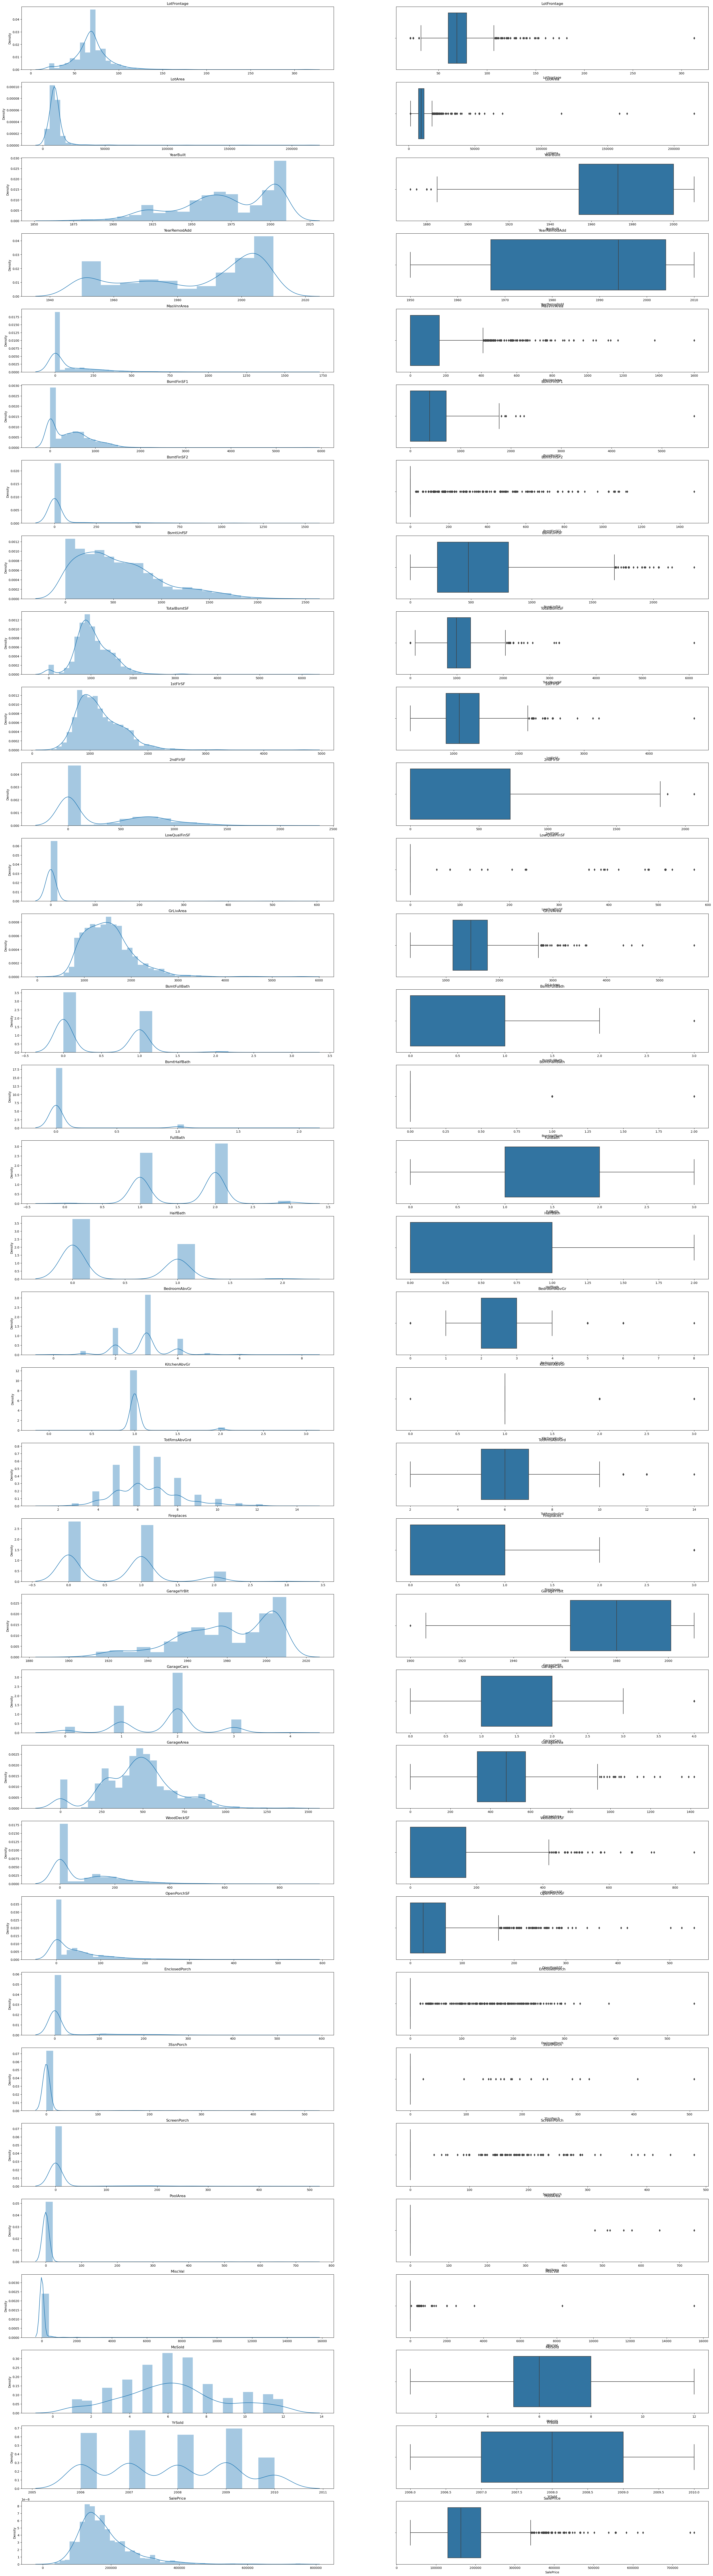

In [251]:
## View the distribution of all numeric variables using histograms and boxplots
length = len(numerical_features)
i = 0
fig, ax = plt.subplots(ncols=2, nrows=length, figsize=(40, 150))

for col in numerical_features:
    sns.distplot(ax = ax[i][0], x = data[col])
    ax[i][0].set_title(col)
    

    sns.boxplot(ax = ax[i][1], x = data[col])
    ax[i][1].set_title(col)
    
    i = i + 1

plt.show()    

#### Observation - there are multiple columns with outlier data such as SalePrice, MiscVal, EnclosedPorch, etc. We would use IQR range approach to remove outliers. Data is not following normal distribution using IQR range approach to remove outlier would drop a lot of data, So alternatively we can use X percentile threshold and drop data beyond it. Example 99 percentile

In [252]:
for col in numerical_features:
    upper_limit = data[col].quantile(0.999) # after some hit and trial 99.9 percentile is picked based on how much data we are dropping.
    lower_limit = data[col].quantile(0.0)
    data = data[(data[col]<=upper_limit) & (data[col]>=lower_limit)]

print(data.shape)

(1411, 59)


In [253]:
# 11.6 % of data was dropped
data.shape

(1411, 59)

In [254]:
# Pool area is no longer useful as all data in it has become 0 so we would drop it
data[numerical_features].quantile([1.0]).T

1.0
LotFrontage       182.0
LotArea        159000.0
YearBuilt        2009.0
YearRemodAdd     2010.0
MasVnrArea       1129.0
BsmtFinSF1       1904.0
BsmtFinSF2       1120.0
BsmtUnfSF        2121.0
TotalBsmtSF      3094.0
1stFlrSF         2524.0
2ndFlrSF         1611.0
LowQualFinSF      514.0
GrLivArea        3279.0
BsmtFullBath        2.0
BsmtHalfBath        1.0
FullBath            3.0
HalfBath            2.0
BedroomAbvGr        6.0
KitchenAbvGr        2.0
TotRmsAbvGrd       12.0
Fireplaces          3.0
GarageYrBlt      2009.0
GarageCars          4.0
GarageArea       1248.0
WoodDeckSF        728.0
OpenPorchSF       502.0
EnclosedPorch     330.0
3SsnPorch         320.0
ScreenPorch       385.0
PoolArea          576.0
MiscVal          3500.0
MoSold             12.0
YrSold           2010.0
SalePrice      555000.0

In [255]:
data.drop(['PoolArea'], axis = 1, inplace = True)
numerical_features.remove('PoolArea')

##### Categorical features anylasis

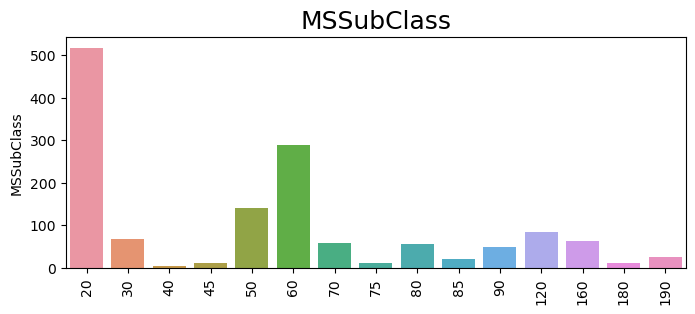

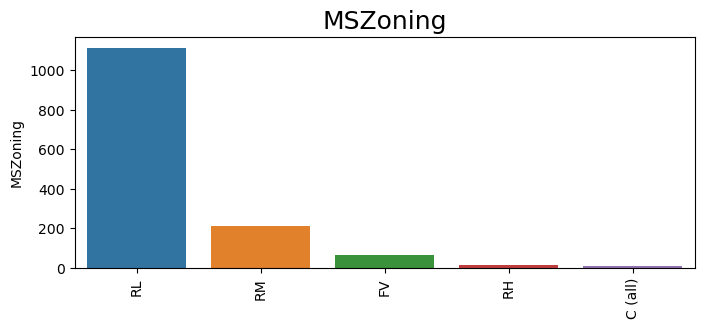

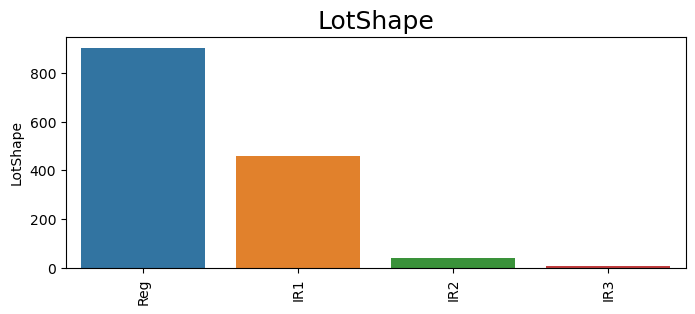

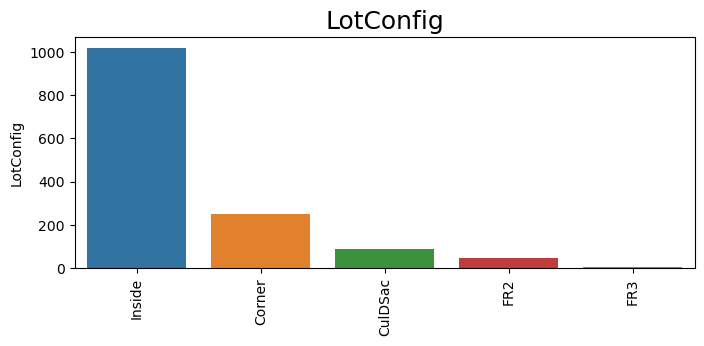

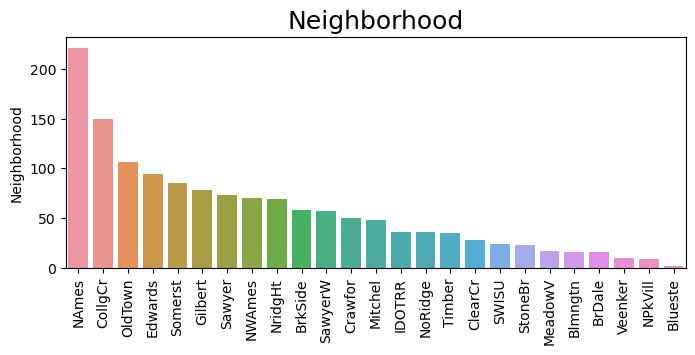

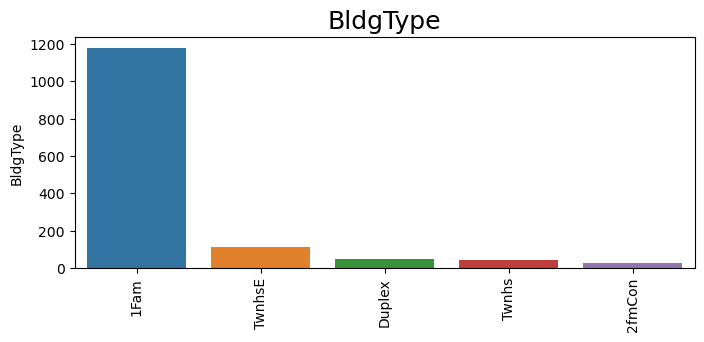

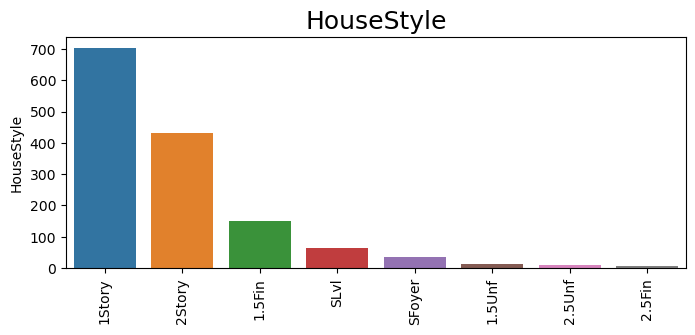

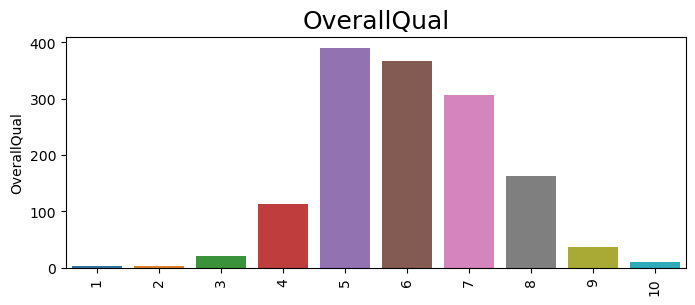

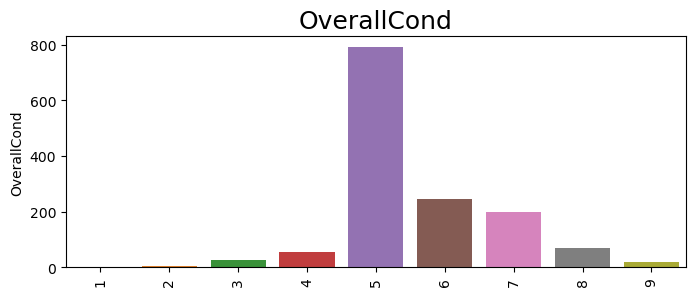

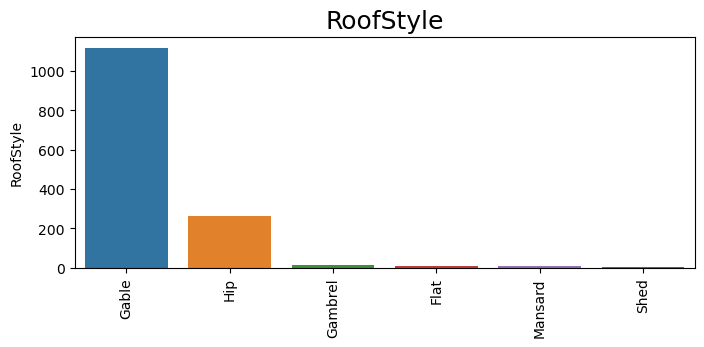

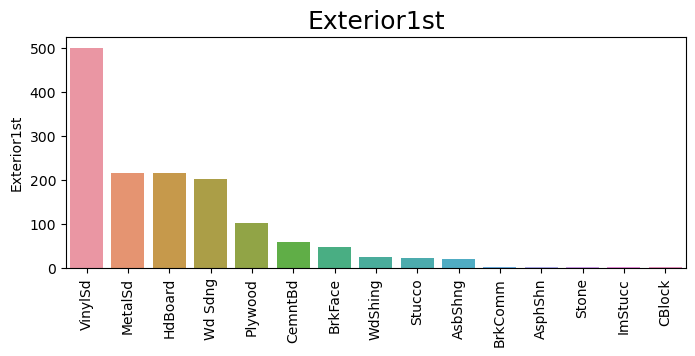

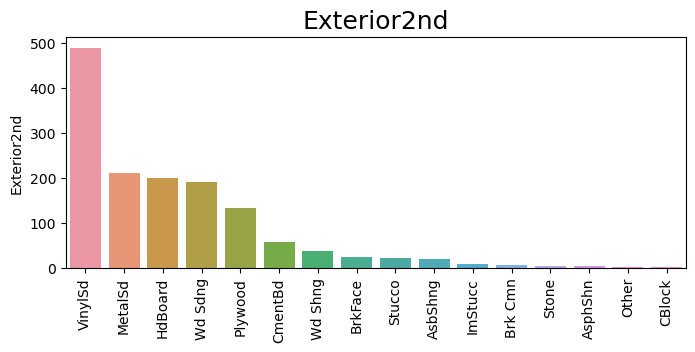

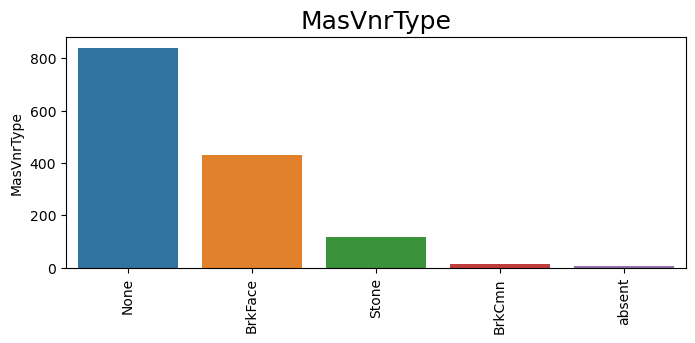

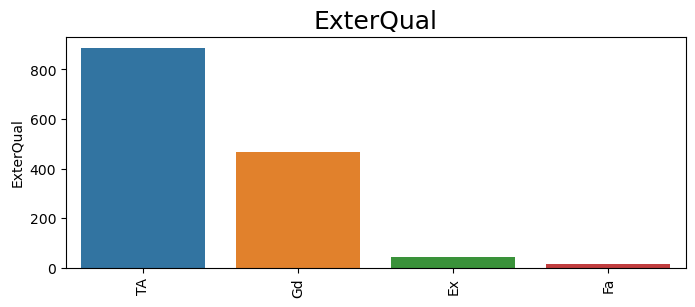

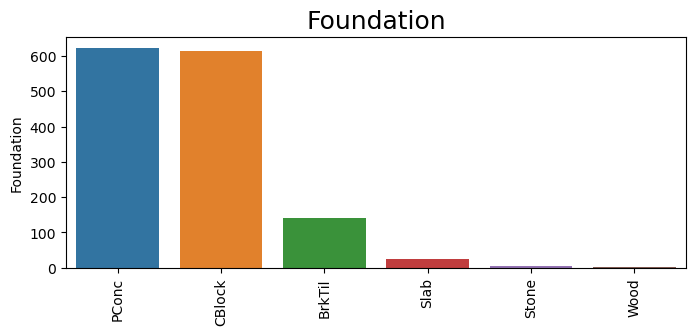

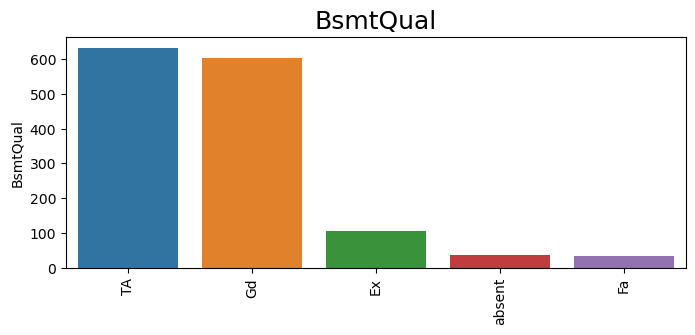

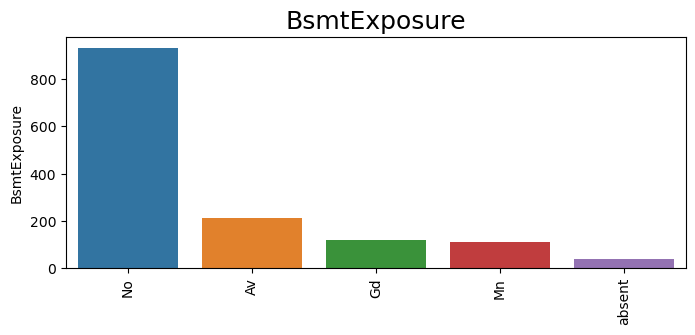

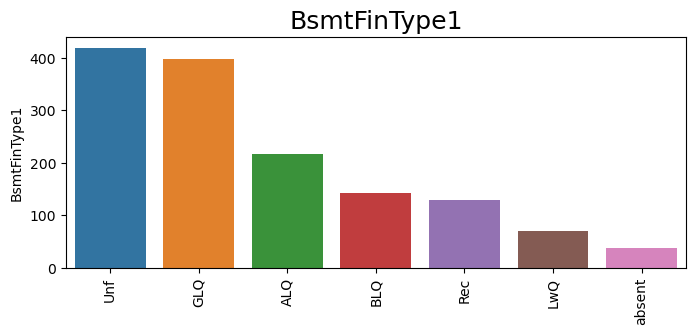

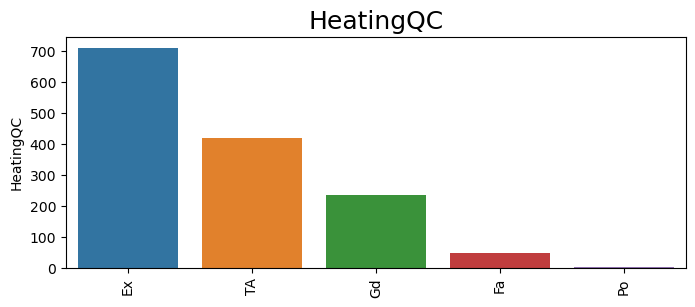

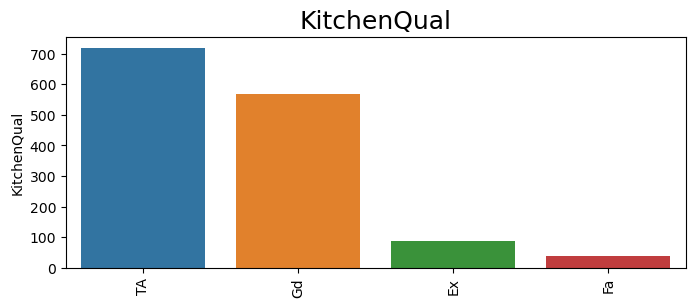

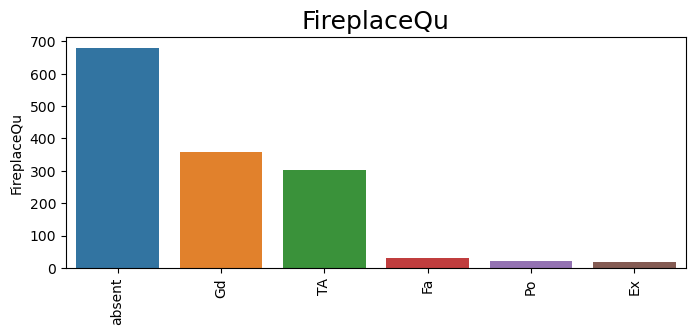

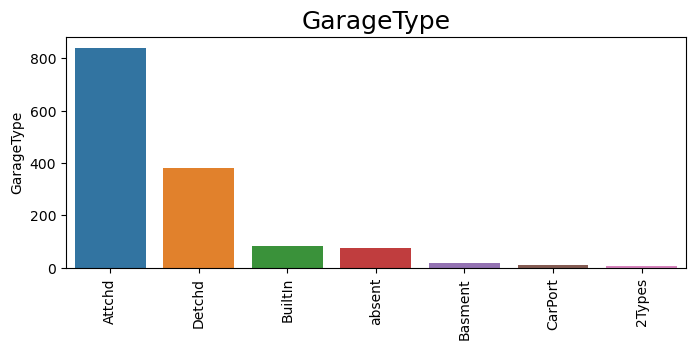

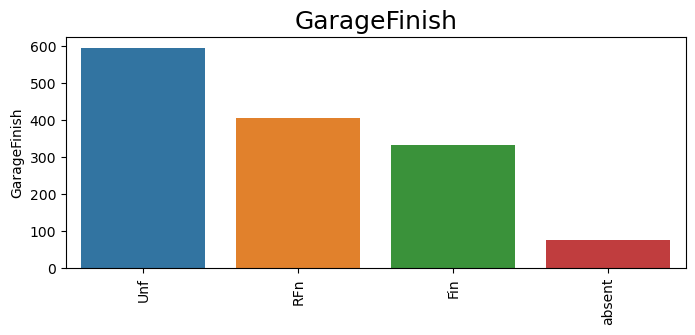

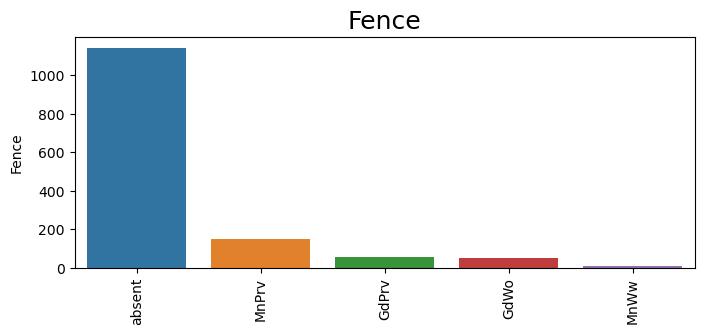

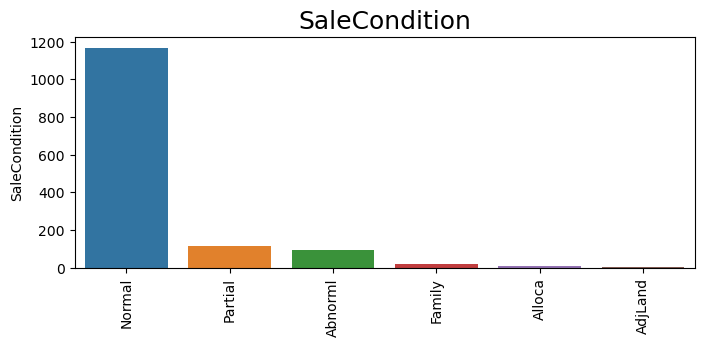

In [256]:
for col in categorical_features:
    plt.figure(figsize=(8,3))
    plt.title(col, fontdict={'fontsize': 18})
    plt.xticks(rotation = 90)
    sns.barplot(x = data[col].value_counts().index, y = data[col].value_counts())
    plt.show()

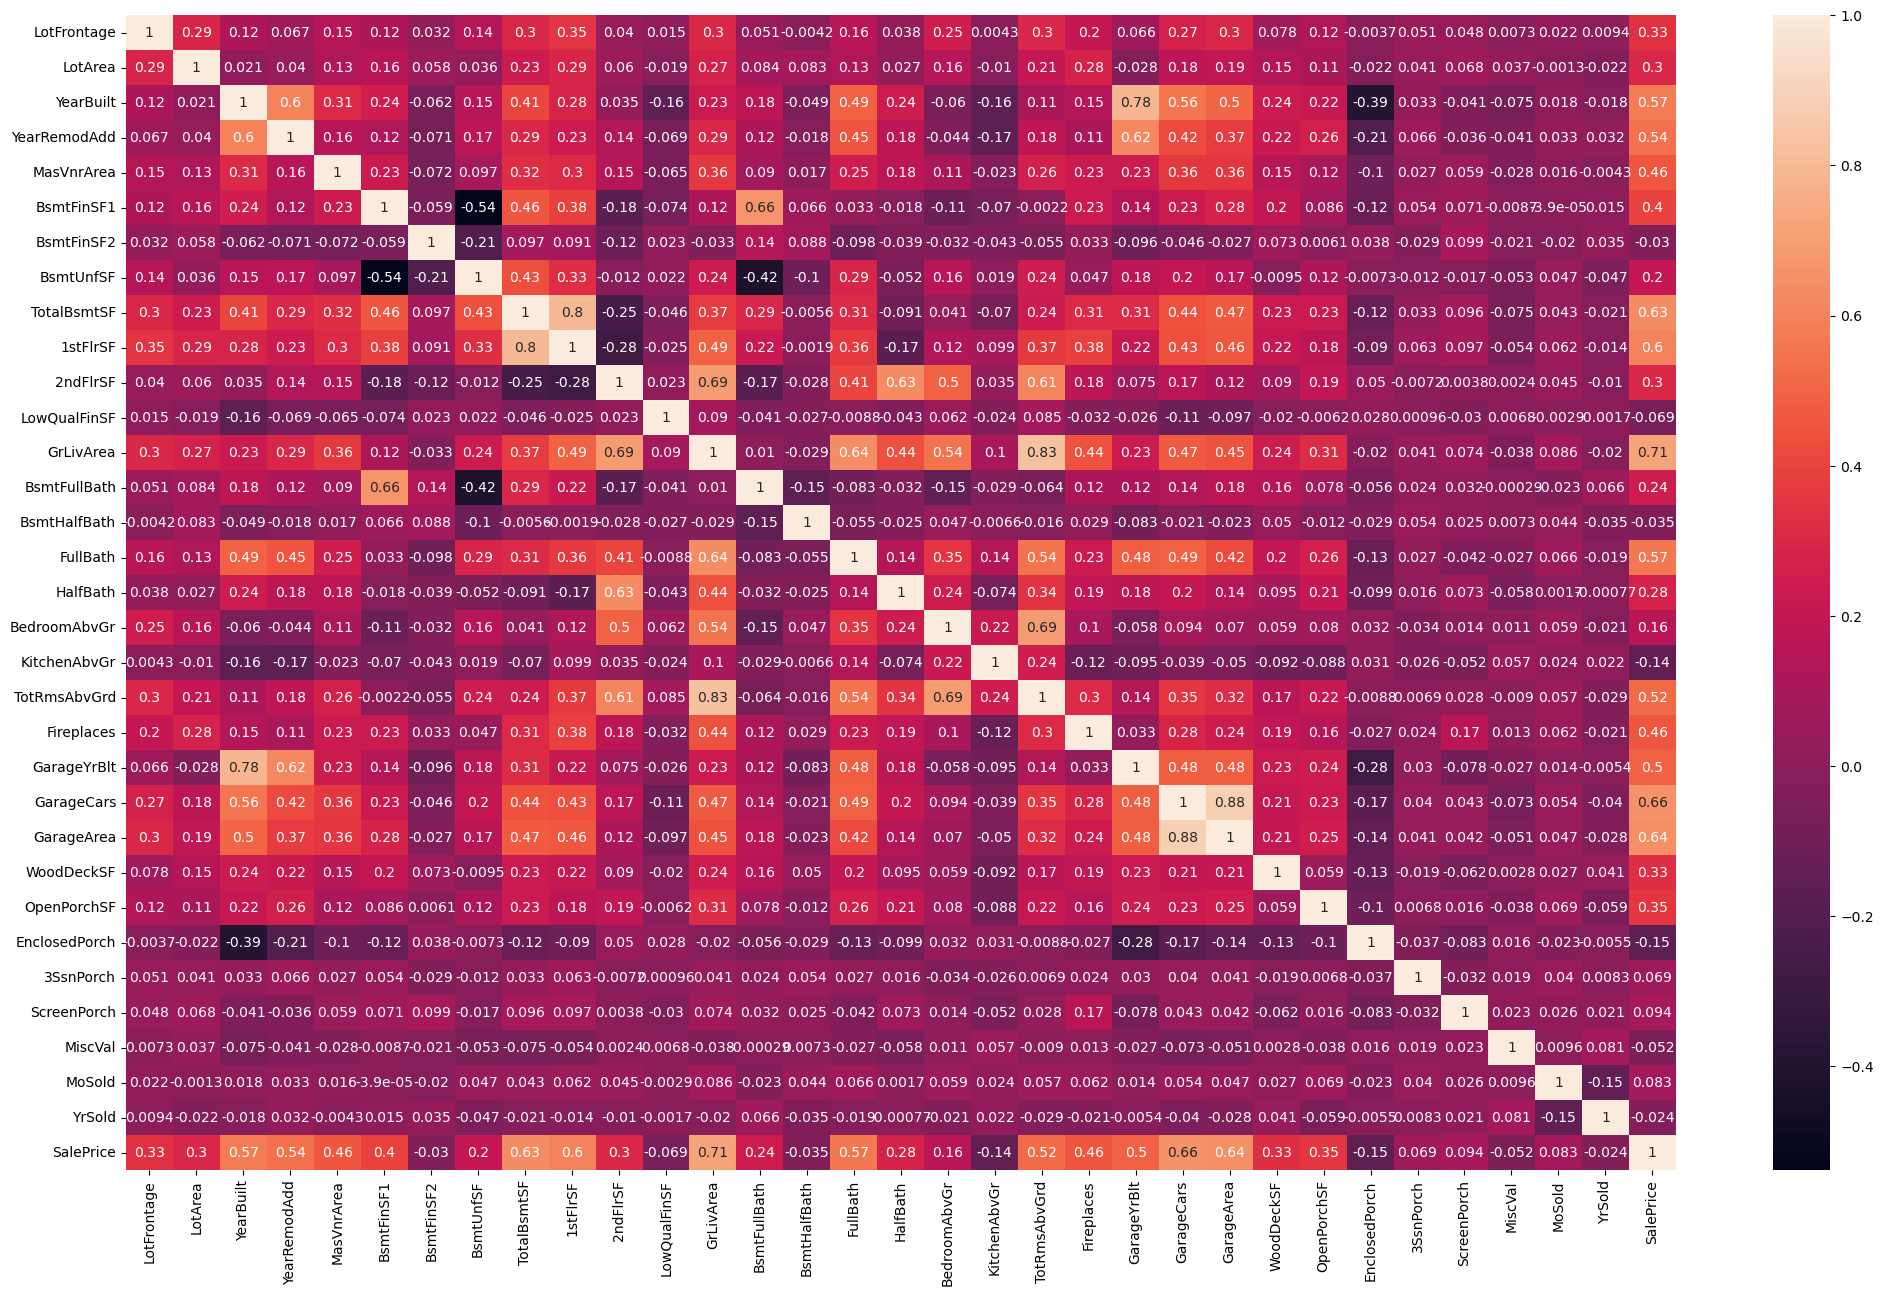

In [257]:
plt.figure(figsize=(25,15))
sns.heatmap(data[numerical_features].corr(), annot=True)
plt.show()

### Observation 
Some of below makes sense and features with high correlation are essentially representing same thing.
#### Top 3 Negative correlation
1. BsmtUnSF and BsmtF2 -0.5
2. BsmtFullBath and BsmeUnfSF -0.42
3. EnclosedPorch and YearBuilt

#### Top 3 Positive Correlation
1. TotRmsAbvGrd and GrLiveArea
2. Garage yr built and yr built 0.78
3. Sale Price and YearBuilt, GrLiveArea, GarageCars, GarageArea, TotalBsmtSF

### Feature Engineering

In [258]:
# New feature for house age and drop YrSold and YearBuilt
data['PropertyAge'] = data['YrSold'] - data['YearBuilt']
data.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
categorical_features, numerical_features = get_cat_num_features(data)

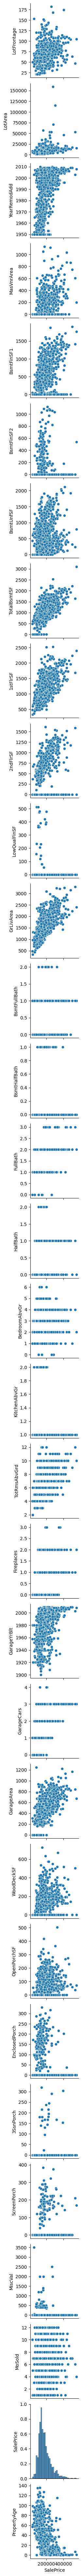

In [259]:
# Pair plot
sns.pairplot(data = data, x_vars=['SalePrice'], y_vars=numerical_features)
plt.show()

### Observation - Following features have somewhat linear realtion with sale-price but there are no significant simple linear relations, so we can try polynomial regression by adding polinomial features.
1. 1stFlrSF
2. 2ndFlrSF
3. GrLiveArea
4. GarageArea
5. PropertyAge (Negative correlation)

In [260]:
# Creating dummy variables
df_cat_encoded = pd.get_dummies(data[categorical_features], drop_first=True)
df_cat_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhoo

In [261]:
print('data', len(data.columns))
print('cat_data', len(df_cat_encoded.columns))
data = data.join(df_cat_encoded)

data 57
cat_data 167


In [262]:
data.drop(categorical_features, axis=1, inplace=True)
print(data.shape)

(1411, 199)


In [263]:
# all features are numeric
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411 entries, 0 to 1458
Columns: 199 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(29), uint8(167)
memory usage: 626.2 KB


### Test train split

In [264]:
X = data.loc[:, data.columns != 'SalePrice']
y = data['SalePrice']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [266]:
# Scale features which were originally numeric or float type
categorical_features, numerical_features = get_cat_num_features(data)
numerical_features.remove('SalePrice')
scaler = MinMaxScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_train.head()

LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
52       0.552795  0.061132      0.216667    0.000000    0.058857    0.635714   
212      0.316770  0.062611      0.983333    0.000000    0.465195    0.000000   
554      0.397516  0.080081      0.900000    0.258636    0.490096    0.000000   
744      0.124224  0.034051      0.716667    0.000000    0.414827    0.000000   
1258     0.236025  0.070945      0.916667    0.161205    0.370685    0.000000   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
52     0.000000     0.263736  0.220091   0.00000           0.0   0.163667   
212    0.036775     0.290886  0.273059   0.57898           0.0   0.515450   
554    0.062235     0.322560  0.306849   0.65450           0.0   0.581324   
744    0.284771     0.432127  0.457991   0.00000           0.0   0.340577   
1258   0.094767     0.276665  0.379909   0.00000           0.0   0.282513   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
52             0.5           0.0  0.333333       0.0      0.333333   
212            0.5           0.0  0.666667       0.5      0.500000   
554            0.5           0.0  0.666667       0.5      0.500000   
744            0.5           0.0  0.666667       0.0      0.333333   
1258           0.5           0.0  0.666667       0.0      0.333333   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
52             0.0           0.3    0.000000     0.577982        0.50   
212            0.0           0.5    0.333333     1.000000        0.50   
554            0.0           0.6    0.333333     0.944954        0.75   
744            0.0           0.3    0.333333     0.853211        0.50   
1258           0.0           0.3    0.000000     0.963303        0.50   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
52      0.422951    0.145604     0.000000       0.000000      0.000   
212     0.527869    0.230769     0.316716       0.000000      0.000   
554     0.713934    0.439560     0.181818       0.000000      0.000   
744     0.378689    0.131868     0.000000       0.212121      0.525   
1258    0.327869    0.291209     0.000000       0.000000      0.000   

      ScreenPorch  MiscVal    MoSold  PropertyAge  MSSubClass_30  \
52            0.0      0.0  0.363636     0.345588            0.0   
212           0.0      0.0  0.545455     0.000000            0.0   
554           0.0      0.0  0.636364     0.036765            0.0   
744           0.0      0.0  0.818182     0.110294            0.0   
1258          0.0      0.0  0.545455     0.022059            0.0   

      MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
52              0.0            0.0            0.0            0.0   
212             0.0            0.0            0.0            1.0   
554             0.0            0.0            0.0            1.0   
744             0.0            0.0            0.0            0.0   
1258            0.0            0.0            0.0            0.0   

      MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
52              0.0            0.0            0.0            0.0   
212             0.0            0.0            0.0            0.0   
554             0.0            0.0            0.0            0.0   
744             0.0            0.0            0.0            0.0   
1258            0.0            0.0            1.0            0.0   

      MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
52              1.0             0.0             0.0             0.0   
212             0.0             0.0             0.0             0.0   
554             0.0             0.0             0.0             0.0   
744             0.0             1.0             0.0             0.0   
1258            0.0             0.0             0.0             0.0   

      MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
52               0.0          0.0      

In [267]:
# Only transform on test set 
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [268]:
# using simple linear regression

In [269]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [270]:
print(lr.coef_)
print(lr.intercept_)

[ 8.86783988e+03  9.71962419e+04  8.05778882e+03  1.03237218e+04
 -6.71735148e+15 -4.25774401e+15 -8.06310271e+15  1.17620178e+16
  1.55997950e+14  1.13187554e+14  3.66132176e+13 -2.09778066e+14
  3.29362500e+03  6.54343750e+02  2.37675000e+03  2.65750000e+03
 -9.98987500e+03 -1.08047500e+04  1.69831250e+04  1.48667500e+04
  1.15412500e+03  2.04543750e+04  1.31630000e+04  8.52287500e+03
  1.15329375e+04  6.80818750e+03  3.19650000e+03  1.30887500e+04
 -1.64657812e+03 -3.15280078e+03 -5.73016562e+04  3.38400000e+03
  9.31356250e+03  2.38794375e+04 -6.85918750e+03  1.12200000e+03
  3.22075000e+03  2.30457812e+04 -2.88362500e+03 -1.18839375e+04
  3.88777727e+14 -6.42200000e+03 -1.51875000e+04  2.14700000e+03
  1.92367847e+14  3.01891250e+04  2.38686875e+04  2.15782500e+04
  1.27297500e+04  5.04650000e+03  4.80750000e+02  2.09650000e+03
  4.62200000e+03 -9.71337500e+03  9.91640625e+02 -9.36812500e+02
  3.33263281e+04  2.50851875e+04  7.13612500e+03 -7.84868750e+03
  2.52500000e+02  2.20337

In [271]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print('r2_score train - ', r2_score(y_train, y_pred_train))
print('r2_score test - ', r2_score(y_test, y_pred_test))

r2_score train -  0.9429455315906987
r2_score test -  -1.17261243973973e+18


### Observation - simple linear regression model is performing very poorly.

#### Since data does not contain significant linear relations, we can apply polynomial transformations.

In [272]:
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(2) # with degree 2 we are already overfitting so not doing beyond it.
X_poly = polyreg.fit_transform(X_train)

In [273]:
lr.fit(X_poly, y_train)

LinearRegression()

In [274]:
y_pred_train = lr.predict(polyreg.fit_transform(X_train))
y_pred_test = lr.predict(polyreg.fit_transform(X_test))
print('r2_score train - ', r2_score(y_train, y_pred_train))
print('r2_score test - ', r2_score(y_test, y_pred_test))

r2_score train -  1.0
r2_score test -  0.849497657120997


### Observation - polynomial model performed better than SLR but it is still overfitting, we can use ridge and lasso regularization to balance model.

### Ridge Regression

In [275]:
# Applying Ridge

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50, 70, 100, 300, 500, 1000]}

# cross validation
folds = 3
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_poly, y_train) 

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=Ridge(alpha=50),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0,
                                   10.0, 50, 70, 100, 300, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [276]:
cv_result_train_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_train_ridge['param_alpha'] = cv_result_train_ridge['param_alpha'].astype('float32')
cv_result_train_ridge

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.167082      0.001145         0.011006        0.001779       0.0001   
1        0.179593      0.012917         0.010938        0.001070       0.0010   
2        0.178662      0.011975         0.010764        0.000552       0.0100   
3        0.178331      0.010971         0.011171        0.001029       0.1000   
4        0.169516      0.005535         0.010138        0.000705       0.5000   
5        0.174756      0.008965         0.010801        0.000915       1.0000   
6        0.170025      0.001841         0.010712        0.001003       5.0000   
7        0.163858      0.003809         0.008676        0.000461      10.0000   
8        0.168959      0.004282         0.011003        0.001415      50.0000   
9        0.170671      0.005213         0.010108        0.000090      70.0000   
10       0.179613      0.019211         0.010012        0.000805     100.0000   
11       0.175220      0.007404         0.009468        0.000412     300.0000   
12       0.173993      0.011854         0.010405        0.001175     500.0000   
13       0.164485      0.009420         0.009348        0.000487    1000.0000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.889208           0.861503   
1    {'alpha': 0.001}           0.889434           0.861578   
2     {'alpha': 0.01}           0.890072           0.862295   
3      {'alpha': 0.1}           0.890191           0.867296   
4      {'alpha': 0.5}           0.892082           0.875707   
5      {'alpha': 1.0}           0.893769           0.880001   
6      {'alpha': 5.0}           0.899763           0.891714   
7     {'alpha': 10.0}           0.902779           0.897326   
8       {'alpha': 50}           0.904967           0.906958   
9       {'alpha': 70}           0.903332           0.907320   
10     {'alpha': 100}           0.900247           0.906602   
11     {'alpha': 300}           0.877821           0.894280   
12     {'alpha': 500}           0.857811           0.881399   
13    {'alpha': 1000}           0.817113           0.853458   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.874254         0.874988        0.011323               12   
1            0.874448         0.875153        0.011383               11   
2            0.875867         0.876078        0.011341               10   
3            0.880336         0.879274        0.009377                9   
4            0.885567         0.884452        0.006731                8   
5            0.888252         0.887341        0.005657                7   
6            0.895806         0.895761        0.003286                5   
7            0.899709         0.899938        0.002232                4   
8            0.907106         0.906344        0.000976                1   
9            0.907465         0.906039        0.001915                2   
10           0.906929         0.904592        0.003076                3   
11           0.895262         0.889121        0.008000                6   
12           0.881609         0.873606        0.011169               13   
13           0.850496         0.840356        0.016479               14   

    split0_train_score  split1_train_score  split2_train_score  \
0             1.000000            1.000000            1.000000   
1             1.000000            1.000000            1.000000   
2             0.999999            1.000000            1.000000   
3             0.999993            0.999993            0.999993   
4             0.999923            0.999920            0.999928   
5             0.999771            0.999787            0.999819   
6             0.997933            0.998100            0.998593   
7             0.995436            0.995711            0.996795   
8             0.980517            0.981447            0.984197   
9             0.975143            0.976349            0.

In [277]:
def r2_score_plot(cv_result, is_log=False):
    plt.figure(figsize=(12,6))
    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
    if is_log == True:
        plt.xscale('log')
    plt.ylabel('R2 Score')
    plt.xlabel('Alpha')
    plt.show()

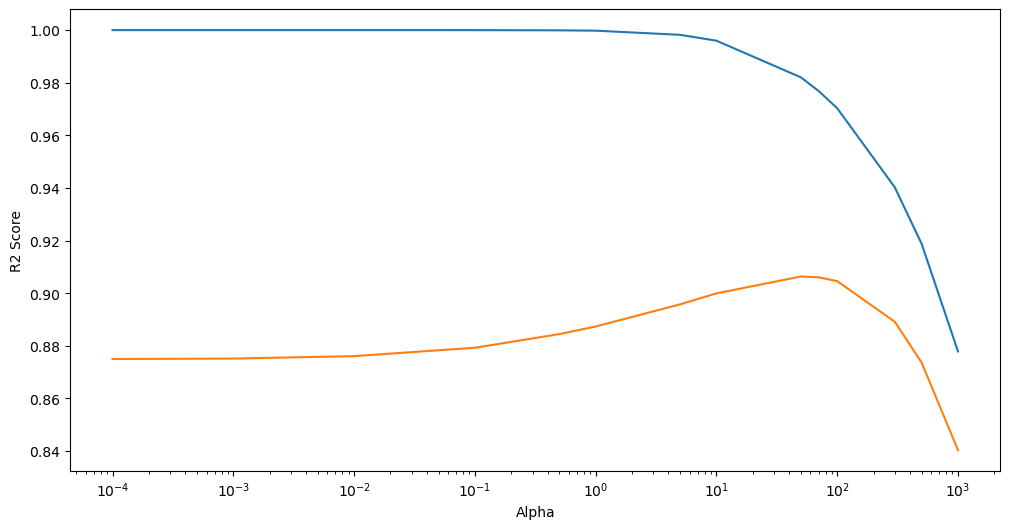

In [278]:
r2_score_plot(cv_result_train_ridge, True)
# observation initially there is train score is very high and test is low as alpha increases train is decresing and test 
# score is increasing after a point(optimal point) both starts decreasing.

In [279]:
model_cv.best_estimator_

Ridge(alpha=50)

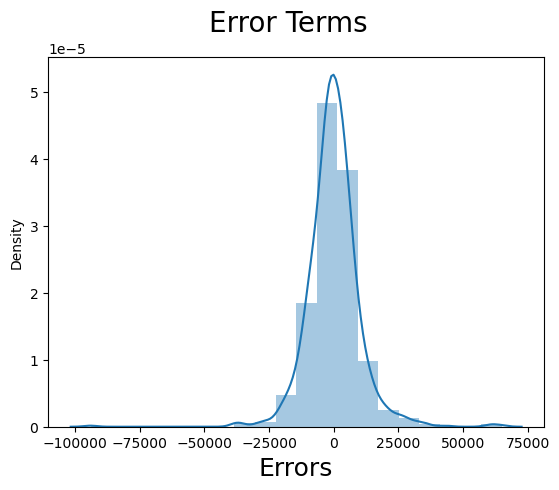

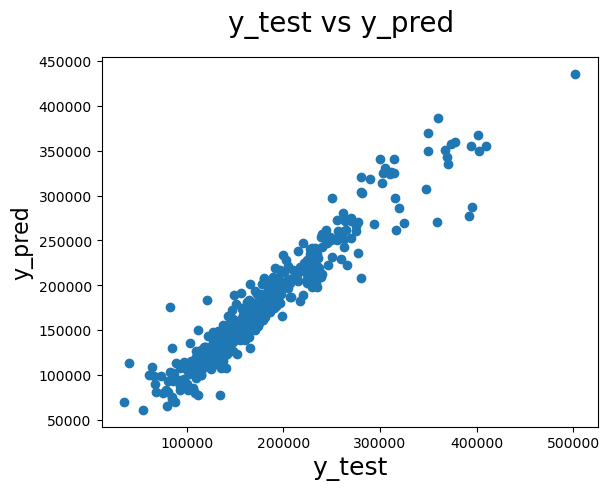

TRAIN >  alpha -  100000 r2 score -  0.979970264382131
TEST >  alpha -  100000 r2 score -  0.9138819301661792


In [280]:
# traning ridge for best estimator and calculating r2 score

ridge = Ridge(50)
ridge.fit(X_poly, y_train)
y_train_pred = ridge.predict(X_poly)
y_pred = ridge.predict(polyreg.transform(X_test))

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

print('TRAIN > ', 'alpha - ', param, 'r2 score - ', r2_score(y_true=y_train, y_pred=y_train_pred))
print('TEST > ', 'alpha - ', param, 'r2 score - ', r2_score(y_true=y_test, y_pred=y_pred))

In [296]:
# Ridge regression parameters
ridge_parameters = list(ridge.coef_ )
ridge_parameters.insert(0, ridge.intercept_)
ridge_parameters = [round(x, 3) for x in ridge_parameters]
ridge_cols = X.columns
ridge_cols = ridge_cols.insert(0, "constant")

ridge_mod = list(zip(ridge_cols, ridge_parameters))
ridge_para = pd.DataFrame(ridge_mod)
ridge_para.columns = ['Variable', 'Coeff']
# sort the coefficients in descending order
ridge_para = ridge_para.sort_values((['Coeff']), axis = 0, ascending = False)
ridge_para

Variable       Coeff
0                 constant  116549.651
13            BsmtFullBath    2829.708
10                2ndFlrSF    2730.334
9                 1stFlrSF    2329.051
6               BsmtFinSF2    2242.130
79     Neighborhood_Timber    1530.276
11            LowQualFinSF    1517.348
20              Fireplaces    1463.250
100         OverallQual_10    1359.176
24              WoodDeckSF    1310.694
101          OverallCond_2    1286.094
23              GarageArea    1250.192
3             YearRemodAdd    1137.473
26           EnclosedPorch    1103.132
8              TotalBsmtSF    1081.358
21             GarageYrBlt    1059.796
16                HalfBath    1059.567
4               MasVnrArea    1023.275
160        BsmtExposure_Mn    1015.974
63    Neighborhood_Edwards     999.633
17            BedroomAbvGr     869.472
29                 MiscVal     865.848
2                  LotArea     862.582
7                BsmtUnfSF     848.819
107          OverallCond_8     802.140
73    Neighborhood_OldTown     759.135
117     Exterior1st_CBlock     754.599
25             OpenPorchSF     746.486
109        RoofStyle_Gable     743.812
99           OverallQual_9     675.027
72    Neighborhood_NridgHt     620.506
54           LotConfig_FR2     609.878
184     GarageType_CarPort     607.964
51            LotShape_IR3     558.311
152        Foundation_Slab     538.022
47             MSZoning_RH     528.285
5               BsmtFinSF1     516.007
125    Exterior1st_VinylSd     485.141
144        MasVnrType_None     467.840
14            BsmtHalfBath     458.014
111          RoofStyle_Hip     444.368
182     GarageType_Basment     415.633
81         BldgType_2fmCon     369.204
37           MSSubClass_70     353.339
49             MSZoning_RM     349.030
106          OverallCond_7     343.840
142    Exterior2nd_Wd Shng     336.336
131     Exterior2nd_CBlock     287.879
146      MasVnrType_absent     286.324
198  SaleCondition_Partial     278.030
119    Exterior1st_HdBoard     230.191
192             Fence_MnWw     225.966
194  SaleCondition_AdjLand     220.678
108          OverallCond_9     213.434
124     Exterior1st_Stucco     210.259
197   SaleCondition_Normal     207.532
78    Neighborhood_StoneBr     188.127
141    Exterior2nd_Wd Sdng     186.881
186      GarageType_absent     181.377
30                  MoSold     175.361
165       BsmtFinType1_LwQ     168.122
48             MSZoning_RL     166.509
123      Exterior1st_Stone     148.475
52            LotShape_Reg     142.561
38           MSSubClass_75     138.557
39           MSSubClass_80     137.641
58     Neighborhood_BrDale     131.152
112      RoofStyle_Mansard     129.675
87       HouseStyle_2.5Fin     122.133
193           Fence_absent     121.380
135    Exterior2nd_MetalSd     112.759
22              GarageCars     105.575
195   SaleCondition_Alloca     103.803
27               3SsnPorch      88.090
180     FireplaceQu_absent      77.352
133    Exterior2nd_HdBoard      74.949
61    Neighborhood_CollgCr      67.871
121    Exterior1st_MetalSd      65.191
28             ScreenPorch      63.666
161        BsmtExposure_No      40.192
126    Exterior1st_Wd Sdng      37.775
98           OverallQual_8      31.186
134    Exterior2nd_ImStucc      29.599
18            KitchenAbvGr      25.489
92           OverallQual_2      17.236
59    Neighborhood_BrkSide      15.594
154        Foundation_Wood      10.604
191            Fence_MnPrv      10.387
70     Neighborhood_NWAmes       7.125
89       HouseStyle_2Story       6.155
114    Exterior1st_AsphShn       0.000
1              LotFrontage       0.000
139     Exterior2nd_Stucco      -1.035
188       GarageFinish_Unf      -3.177
34           MSSubClass_45     -11.669
153       Foundation_Stone     -13.955
115    Exterior1st_BrkComm     -22.321
15                FullBath     -24.203
138      Exterior2nd_Stone     -31.092
129    Exterior2nd_Brk Cmn     -39.821
105          OverallCond_6     -41.141
143     MasVnrType_BrkFace     -50.154
1

### Lasso Regression

In [283]:
# Applying lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50, 70, 100, 300, 500, 1000]}

# cross validation
folds = 3
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_poly, y_train) 

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=Lasso(alpha=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0,
                                   10.0, 50, 70, 100, 300, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [284]:
cv_result_train_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_train_lasso['param_alpha'] = cv_result_train_lasso['param_alpha'].astype('float32')
cv_result_train_lasso

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.167082      0.001145         0.011006        0.001779       0.0001   
1        0.179593      0.012917         0.010938        0.001070       0.0010   
2        0.178662      0.011975         0.010764        0.000552       0.0100   
3        0.178331      0.010971         0.011171        0.001029       0.1000   
4        0.169516      0.005535         0.010138        0.000705       0.5000   
5        0.174756      0.008965         0.010801        0.000915       1.0000   
6        0.170025      0.001841         0.010712        0.001003       5.0000   
7        0.163858      0.003809         0.008676        0.000461      10.0000   
8        0.168959      0.004282         0.011003        0.001415      50.0000   
9        0.170671      0.005213         0.010108        0.000090      70.0000   
10       0.179613      0.019211         0.010012        0.000805     100.0000   
11       0.175220      0.007404         0.009468        0.000412     300.0000   
12       0.173993      0.011854         0.010405        0.001175     500.0000   
13       0.164485      0.009420         0.009348        0.000487    1000.0000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.889208           0.861503   
1    {'alpha': 0.001}           0.889434           0.861578   
2     {'alpha': 0.01}           0.890072           0.862295   
3      {'alpha': 0.1}           0.890191           0.867296   
4      {'alpha': 0.5}           0.892082           0.875707   
5      {'alpha': 1.0}           0.893769           0.880001   
6      {'alpha': 5.0}           0.899763           0.891714   
7     {'alpha': 10.0}           0.902779           0.897326   
8       {'alpha': 50}           0.904967           0.906958   
9       {'alpha': 70}           0.903332           0.907320   
10     {'alpha': 100}           0.900247           0.906602   
11     {'alpha': 300}           0.877821           0.894280   
12     {'alpha': 500}           0.857811           0.881399   
13    {'alpha': 1000}           0.817113           0.853458   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.874254         0.874988        0.011323               12   
1            0.874448         0.875153        0.011383               11   
2            0.875867         0.876078        0.011341               10   
3            0.880336         0.879274        0.009377                9   
4            0.885567         0.884452        0.006731                8   
5            0.888252         0.887341        0.005657                7   
6            0.895806         0.895761        0.003286                5   
7            0.899709         0.899938        0.002232                4   
8            0.907106         0.906344        0.000976                1   
9            0.907465         0.906039        0.001915                2   
10           0.906929         0.904592        0.003076                3   
11           0.895262         0.889121        0.008000                6   
12           0.881609         0.873606        0.011169               13   
13           0.850496         0.840356        0.016479               14   

    split0_train_score  split1_train_score  split2_train_score  \
0             1.000000            1.000000            1.000000   
1             1.000000            1.000000            1.000000   
2             0.999999            1.000000            1.000000   
3             0.999993            0.999993            0.999993   
4             0.999923            0.999920            0.999928   
5             0.999771            0.999787            0.999819   
6             0.997933            0.998100            0.998593   
7             0.995436            0.995711            0.996795   
8             0.980517            0.981447            0.984197   
9             0.975143            0.976349            0.

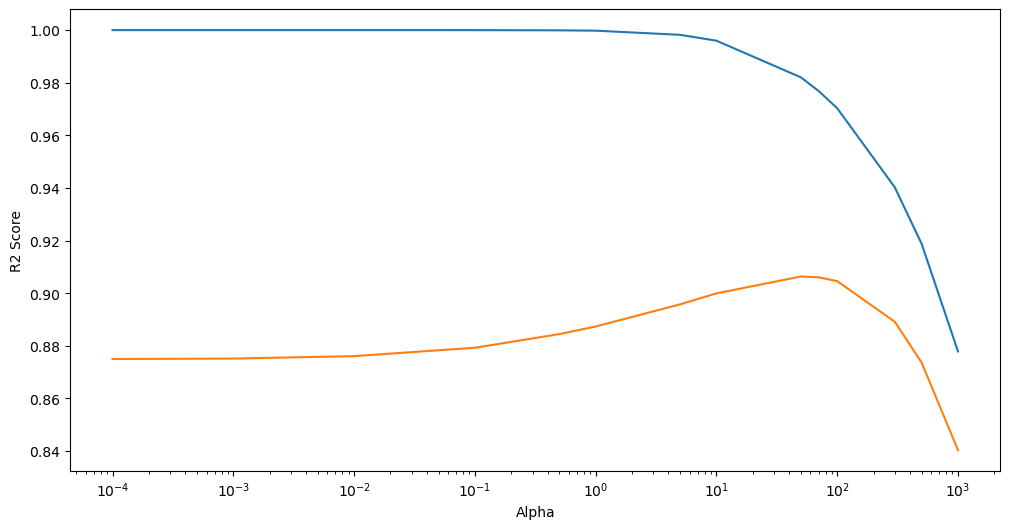

In [285]:
r2_score_plot(cv_result_train_lasso, True)
# observation initially there is train score is very high and test is low as alpha increases train is decresing and test 
# score is increasing after a point(optimal point) both starts decreasing.

In [286]:
lasso_model_cv.best_estimator_

Lasso(alpha=100)

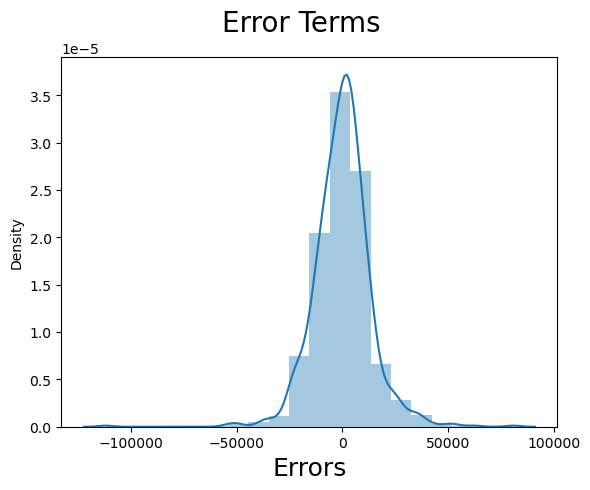

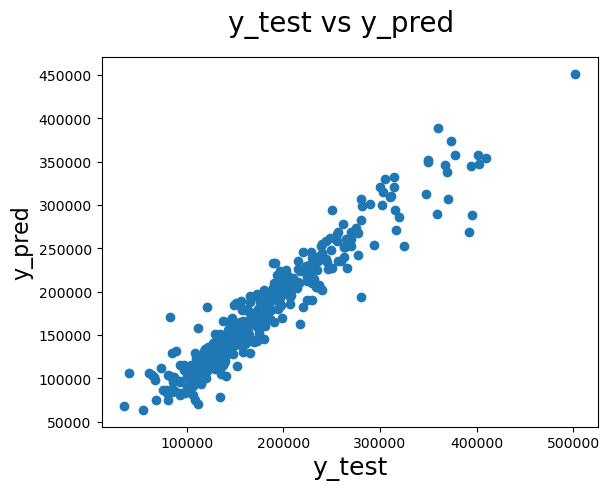

TRAIN >  alpha -  100000 r2 score -  0.9647170013944624
TEST >  alpha -  100000 r2 score -  0.9067626762425925


In [287]:
# traning lasso for best estimator and callculating r2 score
lasso = Lasso(100)
lasso.fit(X_poly, y_train)
y_train_pred = lasso.predict(X_poly)
y_pred = lasso.predict(polyreg.transform(X_test))

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

print('TRAIN > ', 'alpha - ', param, 'r2 score - ', r2_score(y_true=y_train, y_pred=y_train_pred))
print('TEST > ', 'alpha - ', param, 'r2 score - ', r2_score(y_true=y_test, y_pred=y_pred))

In [295]:
# Lasso regression parameters
lasso_parameters = list(lasso.coef_ )
lasso_parameters.insert(0, lasso.intercept_)
lasso_parameters = [round(x, 3) for x in lasso_parameters]
lasso_cols = X.columns
lasso_cols = lasso_cols.insert(0, "constant")

# lasso has made most of the feature cofficent equal to 0.
lasso_mod = list(zip(ridge_cols, lasso_parameters))
lasso_para = pd.DataFrame(lasso_mod)
lasso_para.columns = ['Variable', 'Coeff']
# sort the coefficients in descending order
lasso_para = lasso_para.sort_values((['Coeff']), axis = 0, ascending = False)
lasso_para
pd.DataFrame(lasso_para[(lasso_para['Coeff'] != 0)])

Variable      Coeff
0              constant  98415.418
9              1stFlrSF  48822.783
23           GarageArea  11321.922
13         BsmtFullBath   6839.547
26        EnclosedPorch   5394.125
17         BedroomAbvGr   4281.641
101       OverallCond_2   3507.946
117  Exterior1st_CBlock   2827.825
100      OverallQual_10   2732.984
21          GarageYrBlt   1429.752
2               LotArea   1144.556
184  GarageType_CarPort    415.403
99        OverallQual_9     79.862
174      KitchenQual_Gd   -456.466
95        OverallQual_5  -2482.409
94        OverallQual_4  -3245.901
103       OverallCond_4  -5605.048
19         TotRmsAbvGrd  -7292.853
32        MSSubClass_30 -16395.877

### Submission question related queries

In [290]:
# doubling alpha=50 for ridge. New alpha = 100

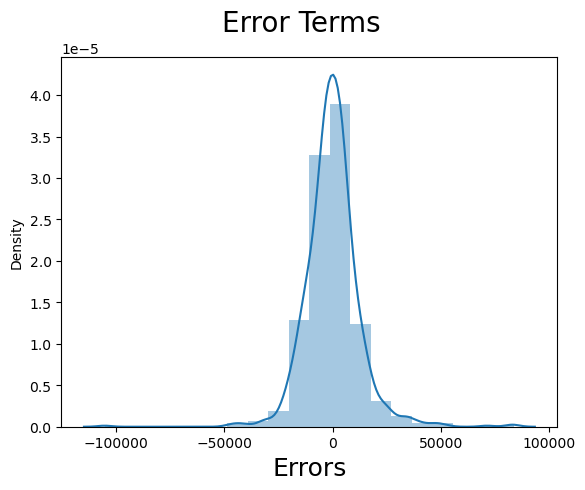

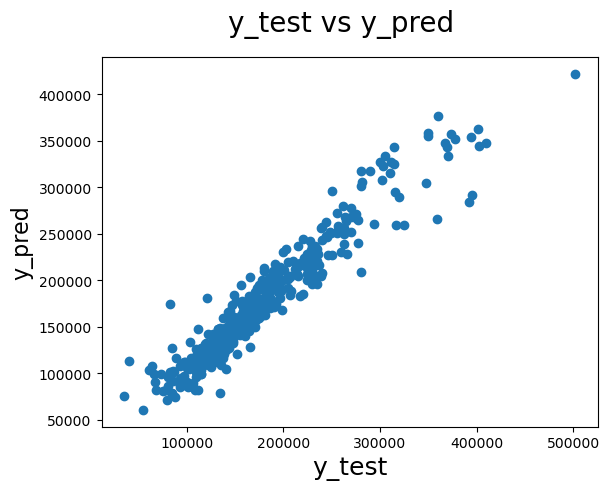

TRAIN >  alpha -  100000 r2 score -  0.9692371463186987
TEST >  alpha -  100000 r2 score -  0.913294025810417


In [300]:
# traning ridge for best estimator and calculating r2 score

ridge = Ridge(100)
ridge.fit(X_poly, y_train)
y_train_pred = ridge.predict(X_poly)
y_pred = ridge.predict(polyreg.transform(X_test))

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

print('TRAIN > ', 'alpha - ', param, 'r2 score - ', r2_score(y_true=y_train, y_pred=y_train_pred))
print('TEST > ', 'alpha - ', param, 'r2 score - ', r2_score(y_true=y_test, y_pred=y_pred))

In [301]:
# Ridge regression parameters
ridge_parameters = list(ridge.coef_ )
ridge_parameters.insert(0, ridge.intercept_)
ridge_parameters = [round(x, 3) for x in ridge_parameters]
ridge_cols = X.columns
ridge_cols = ridge_cols.insert(0, "constant")

ridge_mod = list(zip(ridge_cols, ridge_parameters))
ridge_para = pd.DataFrame(ridge_mod)
ridge_para.columns = ['Variable', 'Coeff']
# sort the coefficients in descending order
ridge_para = ridge_para.sort_values((['Coeff']), axis = 0, ascending = False)
ridge_para

Variable       Coeff
0                 constant  121619.511
13            BsmtFullBath    2538.521
10                2ndFlrSF    2489.586
9                 1stFlrSF    2067.974
6               BsmtFinSF2    2052.199
20              Fireplaces    1439.825
79     Neighborhood_Timber    1343.954
11            LowQualFinSF    1304.548
24              WoodDeckSF    1299.856
100         OverallQual_10    1286.723
101          OverallCond_2    1229.993
23              GarageArea    1194.402
4               MasVnrArea    1122.666
160        BsmtExposure_Mn    1013.983
16                HalfBath    1004.841
26           EnclosedPorch     998.688
63    Neighborhood_Edwards     961.521
8              TotalBsmtSF     956.399
21             GarageYrBlt     927.278
3             YearRemodAdd     878.997
73    Neighborhood_OldTown     841.540
17            BedroomAbvGr     833.867
2                  LotArea     801.807
29                 MiscVal     733.665
117     Exterior1st_CBlock     722.894
107          OverallCond_8     719.156
25             OpenPorchSF     696.769
99           OverallQual_9     677.843
7                BsmtUnfSF     663.887
184     GarageType_CarPort     629.286
109        RoofStyle_Gable     606.097
5               BsmtFinSF1     595.283
152        Foundation_Slab     593.169
54           LotConfig_FR2     581.071
51            LotShape_IR3     572.223
72    Neighborhood_NridgHt     552.089
14            BsmtHalfBath     519.705
182     GarageType_Basment     455.793
47             MSZoning_RH     454.299
49             MSZoning_RM     410.874
37           MSSubClass_70     396.528
144        MasVnrType_None     371.032
125    Exterior1st_VinylSd     348.160
111          RoofStyle_Hip     334.607
146      MasVnrType_absent     321.427
106          OverallCond_7     317.844
81         BldgType_2fmCon     285.175
119    Exterior1st_HdBoard     284.462
165       BsmtFinType1_LwQ     270.449
142    Exterior2nd_Wd Shng     264.541
198  SaleCondition_Partial     252.276
131     Exterior2nd_CBlock     248.661
78    Neighborhood_StoneBr     235.023
108          OverallCond_9     207.706
38           MSSubClass_75     200.747
194  SaleCondition_AdjLand     198.906
22              GarageCars     187.342
141    Exterior2nd_Wd Sdng     152.231
124     Exterior1st_Stucco     150.979
112      RoofStyle_Mansard     148.415
133    Exterior2nd_HdBoard     138.937
192             Fence_MnWw     119.009
39           MSSubClass_80     115.884
61    Neighborhood_CollgCr     112.941
18            KitchenAbvGr     111.686
48             MSZoning_RL     108.464
123      Exterior1st_Stone     106.473
52            LotShape_Reg      98.421
87       HouseStyle_2.5Fin      98.255
30                  MoSold      96.319
197   SaleCondition_Normal      90.410
178         FireplaceQu_Po      85.950
180     FireplaceQu_absent      85.066
135    Exterior2nd_MetalSd      80.282
186      GarageType_absent      79.618
58     Neighborhood_BrDale      77.435
195   SaleCondition_Alloca      72.003
193           Fence_absent      66.089
121    Exterior1st_MetalSd      64.308
98           OverallQual_8      62.649
27               3SsnPorch      44.597
28             ScreenPorch      42.732
89       HouseStyle_2Story      30.020
59    Neighborhood_BrkSide      19.291
126    Exterior1st_Wd Sdng      15.531
70     Neighborhood_NWAmes      15.520
90       HouseStyle_SFoyer      10.909
154        Foundation_Wood      10.841
139     Exterior2nd_Stucco      10.776
34           MSSubClass_45       2.977
1              LotFrontage       0.000
114    Exterior1st_AsphShn       0.000
161        BsmtExposure_No      -3.410
105          OverallCond_6      -5.501
92           OverallQual_2      -6.958
134    Exterior2nd_ImStucc     -12.912
129    Exterior2nd_Brk Cmn     -15.574
115    Exterior1st_BrkComm     -16.874
15                FullBath     -31.008
155            BsmtQual_Fa     -33.906
191            Fence_MnPrv     -38.240
136      Exterior2nd_Other     -47.130
6

In [302]:
# doubling alpha=100 for lasso. New alpha = 200

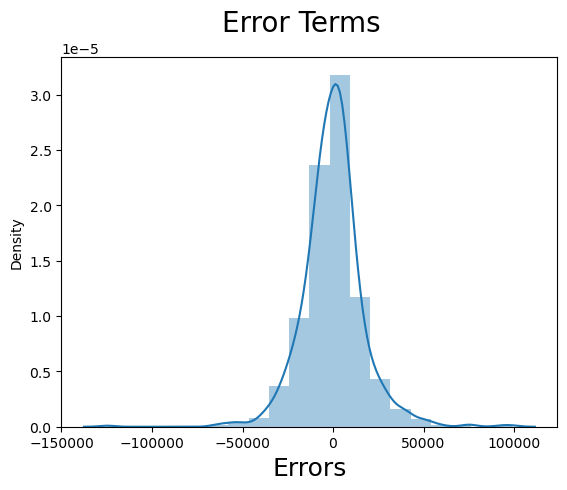

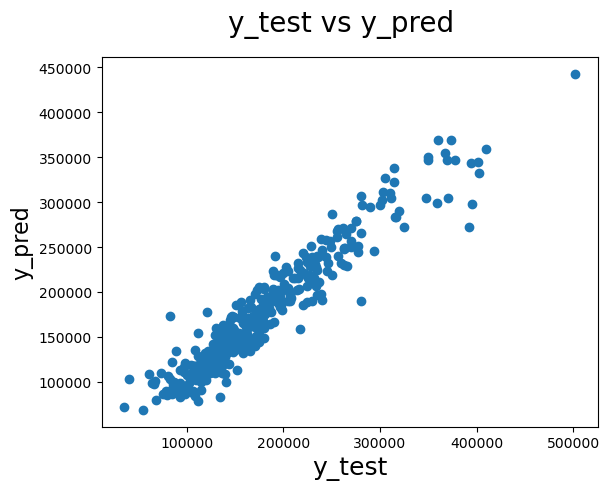

TRAIN >  alpha -  100000 r2 score -  0.9450434544092347
TEST >  alpha -  100000 r2 score -  0.9069254134244499


In [303]:
# traning lasso for best estimator and callculating r2 score
lasso = Lasso(200)
lasso.fit(X_poly, y_train)
y_train_pred = lasso.predict(X_poly)
y_pred = lasso.predict(polyreg.transform(X_test))

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

print('TRAIN > ', 'alpha - ', param, 'r2 score - ', r2_score(y_true=y_train, y_pred=y_train_pred))
print('TEST > ', 'alpha - ', param, 'r2 score - ', r2_score(y_true=y_test, y_pred=y_pred))

In [304]:
# Lasso regression parameters
lasso_parameters = list(lasso.coef_ )
lasso_parameters.insert(0, lasso.intercept_)
lasso_parameters = [round(x, 3) for x in lasso_parameters]
lasso_cols = X.columns
lasso_cols = lasso_cols.insert(0, "constant")

# lasso has made most of the feature cofficent equal to 0.
lasso_mod = list(zip(ridge_cols, lasso_parameters))
lasso_para = pd.DataFrame(lasso_mod)
lasso_para.columns = ['Variable', 'Coeff']
# sort the coefficients in descending order
lasso_para = lasso_para.sort_values((['Coeff']), axis = 0, ascending = False)
lasso_para
pd.DataFrame(lasso_para[(lasso_para['Coeff'] != 0)])

Variable      Coeff
0               constant  96388.147
9               1stFlrSF  53330.080
23            GarageArea   7357.954
13          BsmtFullBath   7189.252
26         EnclosedPorch   5730.969
101        OverallCond_2   4164.480
100       OverallQual_10   3266.805
17          BedroomAbvGr   2973.593
99         OverallQual_9   2435.825
117   Exterior1st_CBlock   1703.600
182   GarageType_Basment     29.286
174       KitchenQual_Gd    -81.120
170         HeatingQC_Gd   -120.718
96         OverallQual_6   -379.167
120  Exterior1st_ImStucc   -471.978
104        OverallCond_5   -585.580
94         OverallQual_4   -610.411
150    Foundation_CBlock   -743.494
95         OverallQual_5  -2298.382
19          TotRmsAbvGrd  -4614.327
103        OverallCond_4  -6378.463
32         MSSubClass_30 -10654.743